In [57]:
import pandas as pd

df = pd.read_csv('Mallcust.csv')

In [4]:
df.head(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,male,single,67,universty,124670,skilled employee,big city
1,female,non-single,22,high school,150773,skilled employee,big city
2,male,single,49,high school,89210,unemployed,small city
3,male,single,45,high school,171565,skilled employee,mid-sized city
4,male,single,53,high school,149031,skilled employee,mid-sized city


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sex              2000 non-null   object
 1   Marital status   2000 non-null   object
 2   Age              2000 non-null   int64 
 3   Education        2000 non-null   object
 4   Income           2000 non-null   int64 
 5   Occupation       2000 non-null   object
 6   Settlement size  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [7]:
df.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [17]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots


fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("Gender Distribution", "Marital Status Distribution",
                    "Age Distribution", "Income Distribution",
                    "Education vs Income", "Occupation by Settlement Size"),
    vertical_spacing=0.15, horizontal_spacing=0.1
)

# 1. Gender Distribution (Bar Chart)
gender_counts = df['Sex'].value_counts().reset_index()
gender_counts.columns = ['Sex', 'count']
gender_fig = px.bar(gender_counts, x='Sex', y='count', title='Gender Distribution')
fig.add_trace(gender_fig['data'][0], row=1, col=1)

# 2. Marital Status Distribution (Bar Chart)
marital_counts = df['Marital status'].value_counts().reset_index()
marital_counts.columns = ['Marital status', 'count']
marital_fig = px.bar(marital_counts, x='Marital status', y='count', title='Marital Status Distribution')
fig.add_trace(marital_fig['data'][0], row=1, col=2)

# 3. Age Distribution
age_fig = px.histogram(df, x='Age', nbins=20, title='Age Distribution')
age_fig.update_traces(marker_color='blue')
fig.add_trace(age_fig['data'][0], row=2, col=1)

# 4. Income Distribution
income_fig = px.histogram(df, x='Income', nbins=20, title='Income Distribution')
income_fig.update_traces(marker_color='green')
fig.add_trace(income_fig['data'][0], row=2, col=2)

# 5. Education vs Income
edu_income_fig = px.box(df, x='Education', y='Income', title='Income by Education Level')
edu_income_fig.update_traces(marker_color='orange')
fig.add_trace(edu_income_fig['data'][0], row=3, col=1)

# 6. Occupation by Settlement Sze
occ_sett_fig = px.bar(df, x='Occupation', color='Settlement size', barmode='group', title='Occupation by Settlement Size')
fig.add_trace(occ_sett_fig['data'][0], row=3, col=2)
fig.add_trace(occ_sett_fig['data'][1], row=3, col=2)
fig.add_trace(occ_sett_fig['data'][2], row=3, col=2)


fig.update_layout(
    title_text="Mall Customer Data Overview",
    title_font_size=24,
    showlegend=False,
    height=1000,
    annotations=[
        dict(
            text="This poster summarizes key insights from the Mall Customer dataset. It highlights the distribution of demographics such as gender, marital status, and age, "
                 "as well as financial data like income distribution and its relationship to education level. Additionally, it provides an overview of occupations by settlement size, "
                 "offering a comprehensive view of customer profiles.",
            xref="paper", yref="paper",
            x=0.5, y=-0.1, showarrow=False, font_size=14
        )
    ]
)

# Show the figure
fig.show()


In [58]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


label_encoders = {}
for column in ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

scaler = StandardScaler()
df[['Age', 'Income']] = scaler.fit_transform(df[['Age', 'Income']])

data = df[['Age', 'Income', 'Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']]




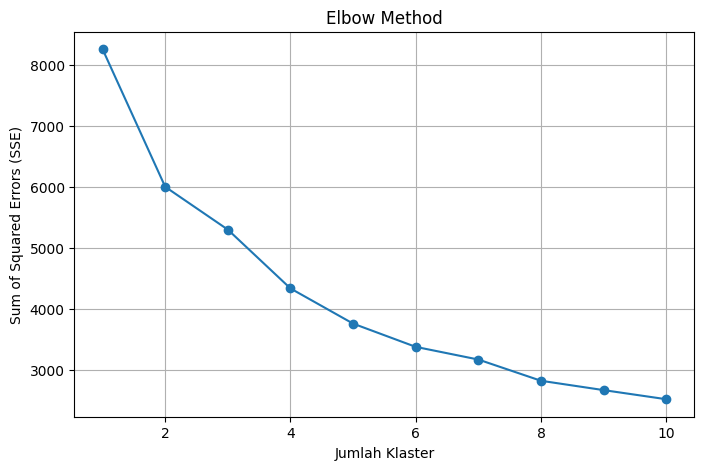

In [48]:
sse = []
k_range = range(1, 11) 
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    sse.append(kmeans.inertia_) 


plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()



best of cluster: 3


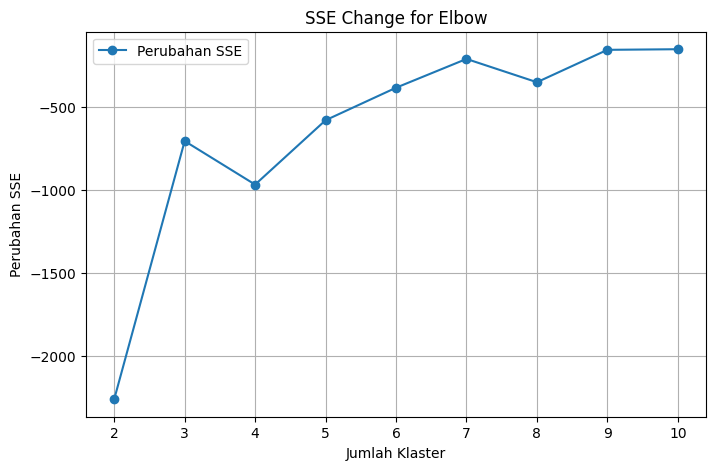

In [49]:
sse_diff = np.diff(sse)
sse_diff2 = np.diff(sse_diff)

elbow_point = np.argmin(sse_diff2) + 2  

print(f'best of cluster: {elbow_point}')

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sse_diff, marker='o', label='Perubahan SSE')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Perubahan SSE')
plt.title('SSE Change for Elbow')
plt.grid(True)
plt.legend()
plt.show()

TypeError: object of type 'GridSpec' has no len()

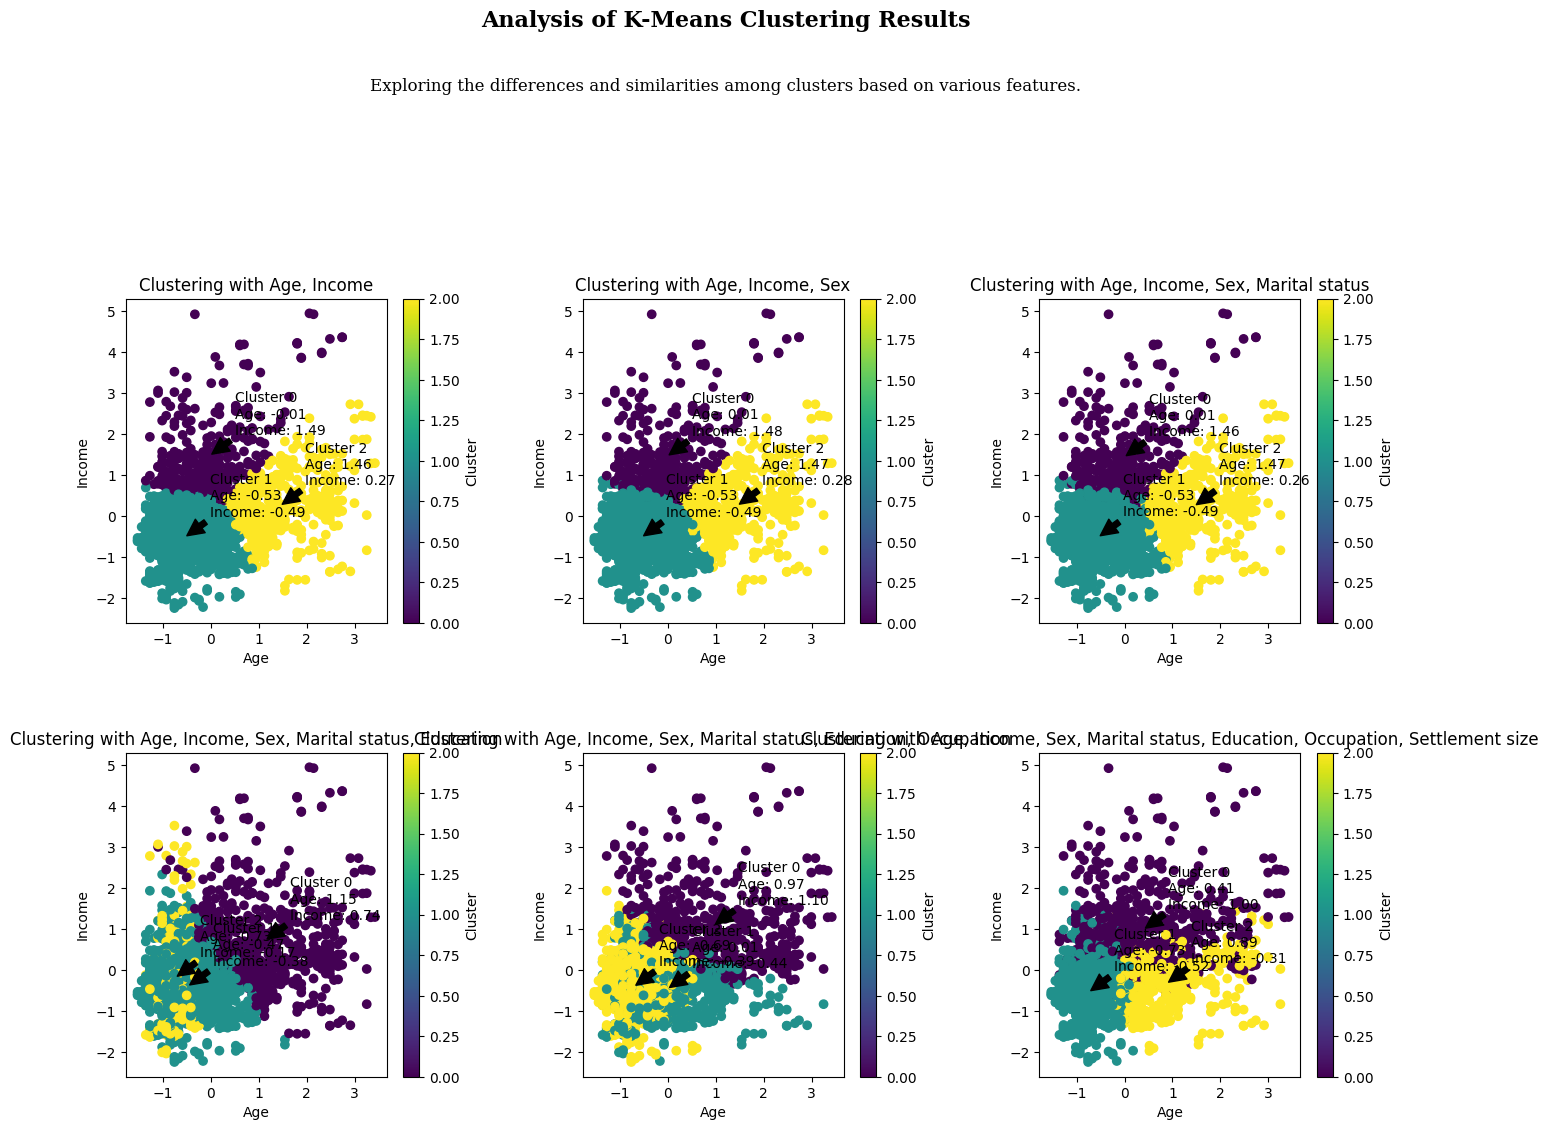

In [62]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

scaler = StandardScaler()
df[['Age', 'Income']] = scaler.fit_transform(df[['Age', 'Income']])

combinations = [
    ['Age', 'Income'],
    ['Age', 'Income', 'Sex'],
    ['Age', 'Income', 'Sex', 'Marital status'],
    ['Age', 'Income', 'Sex', 'Marital status', 'Education'],
    ['Age', 'Income', 'Sex', 'Marital status', 'Education', 'Occupation'],
    ['Age', 'Income', 'Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']
]

num_plots = len(combinations)
num_rows = 3
num_cols = 3

fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(num_rows, num_cols, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1], hspace=0.4, wspace=0.4)


fig.text(0.5, 1.05, 'Analysis of K-Means Clustering Results', fontsize=16, fontweight='bold', fontfamily='serif', ha='center')
fig.text(0.5, 1.01, 'Exploring the differences and similarities among clusters based on various features.', fontsize=12, fontweight='light', fontfamily='serif', ha='center')

for i, combo in enumerate(combinations):
    ax = fig.add_subplot(gs[i])
    
    # Klasterisasi
    data = df[combo]
    kmeans = KMeans(n_clusters=3, random_state=0)
    df['Cluster'] = kmeans.fit_predict(data)
    
    scatter = ax.scatter(df['Age'], df['Income'], c=df['Cluster'], cmap='viridis')
    ax.set_xlabel('Age')
    ax.set_ylabel('Income')
    ax.set_title(f'Clustering with {", ".join(combo)}')
    
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Cluster')

    for cluster_id in range(3):
        cluster_data = df[df['Cluster'] == cluster_id]
        avg_age = cluster_data['Age'].mean()
        avg_income = cluster_data['Income'].mean()
        
        ax.annotate(
            f'Cluster {cluster_id}\nAge: {avg_age:.2f}\nIncome: {avg_income:.2f}',
            xy=(avg_age, avg_income),
            xytext=(avg_age + 0.5, avg_income + 0.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=10,
            color='black'
        )

for j in range(num_plots, len(gs)):
    fig.delaxes(fig.axes[j])

plt.tight_layout()
plt.show()

In [42]:
import plotly.graph_objects as go
import plotly.offline as py

df = pd.read_csv('Mallcust.csv')
scaler = StandardScaler()
x_3 = scaler.fit_transform(df[['Age', 'Income']])  

algorithm = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
algorithm.fit(x_3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

df['label3'] = labels3

# Buat plot 3D
trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Income'],  #
    z=df['Income'],  
    mode='markers',
    marker=dict(
        color=df['label3'],
        size=20,
        line=dict(
            color=df['label3'],
            width=12
        ),
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    title='Clusters',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Income'),
        zaxis=dict(title='Income')  
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load data
df = pd.read_csv('Mallcust.csv')

# Encode categorical variables
label_encoders = {}
for column in ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Standardize numerical features
scaler = StandardScaler()
df[['Age', 'Income']] = scaler.fit_transform(df[['Age', 'Income']])

# Prepare data for K-Means
data = df[['Age', 'Income', 'Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']]

# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(data)

# Save models and scaler
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']

In [2]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [3]:
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']